# Supervised Learning: Linear Regression

This project we will be going over linear regression, and will provide reference for future Machine Learning projects. We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding.

For reference of the deeper mathematics of linear regession methods, check out the [wikipedia page](http://en.wikipedia.org/wiki/Linear_regression) and also check out Andrew Ng's lectures for free on [youtube](https://www.youtube.com/watch?v=5u4G23_OohI).

In this section we will be working through linear regression with the following steps:

    Step 1: Getting and setting up the data.
    Step 2: Visualizing current data.
    Step 3: The mathematics behind the Least Squares Method.
    Step 4: Using Numpy for a Univariate Linear Regression.
    Step 5: Getting the error.
    Step 6: Using scikit learn to implement a multivariate regression.
    Step 7: Using Training and Validation.  
    Step 8: Predicting Prices
    Step 9 : Residual Plots
    

### Step 1: Getting and setting up the data.

Start with the example dataset from scikit-learn.

In [3]:
# Import the libraries you will use for:

#data storage, orientation, and manipulation [i.e. standard numpy and pandas imports]
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#standard plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#standard stats library
from scipy import stats

#command for showing plots in jupyter notebooks
%matplotlib inline

In [2]:
# Import boston dataset from scikit-learn
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


NOTE - because above error we will use the California Housing dataset to mimic the uploading style, but would like to try the Boston dataset as additional practice afterwards.

In [4]:
# Import California dataset from scikit-learn:
from sklearn.datasets import fetch_california_housing
# Lead the housing dataset
housing = fetch_california_housing()

In [5]:
# See what the dataset contains, via scikit documentation
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Step 2: Visualizing current data

A good first step is to always get a quick visualization of the available data.

Text(0, 0.5, 'Number of Houses')

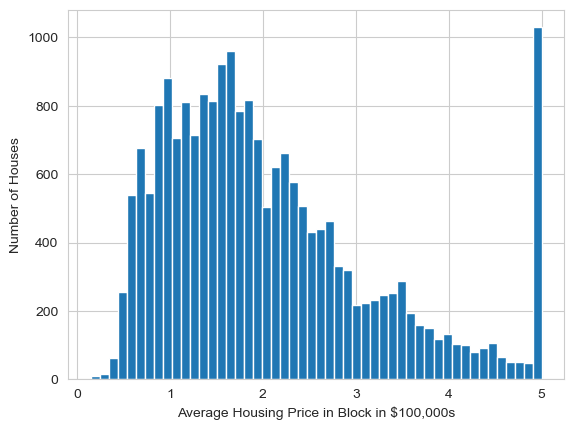

In [9]:
# Plot a histogram of the prices (this is the target of our dataset)
plt.hist(housing.target, bins = 50)

# Labelling histogram
plt.xlabel('Average Housing Price in Block in $100,000s')
plt.ylabel('Number of Houses')

To get an idea of possible correlation, let's create a scatter plot of one feature vs. the target.

Text(0.5, 0, 'Number of Rooms')

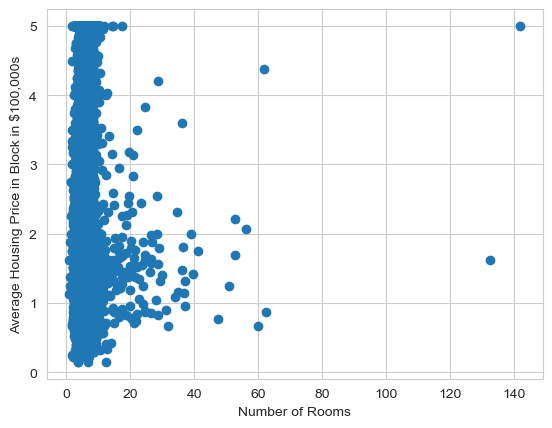

In [15]:
# Plot a scatter of the price [target of dataset] vs. Number of Rooms per dwelling
plt.scatter(housing.data[:,2], housing.target)

# Labelling scatter
plt.ylabel('Average Housing Price in Block in $100,000s')
plt.xlabel('Number of Rooms')

Unlike the Boston data it is hard to see a specific trend line between price and number of rooms. I wonder if this is a function of the blocks data as opposed to houses. Either way, we will try and perform a linear fit of the data using pandas dataframes and seaborn as an exercise.

Let's try to do the following:

    1.) Use pandas to transform the housing dataset into a DataFrame: 
    
    2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [5]:
# Set the housing data as a pandas DataFrame
df_housing = DataFrame(housing.data)

# Label the columns
df_housing.columns = housing.feature_names

# Show the dataset
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now let's add the target of the housing data set, the price. We'll create a new column in our DataFrame.

In [6]:
df_housing['Price'] = housing.target

In [18]:
# Show the dataset
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


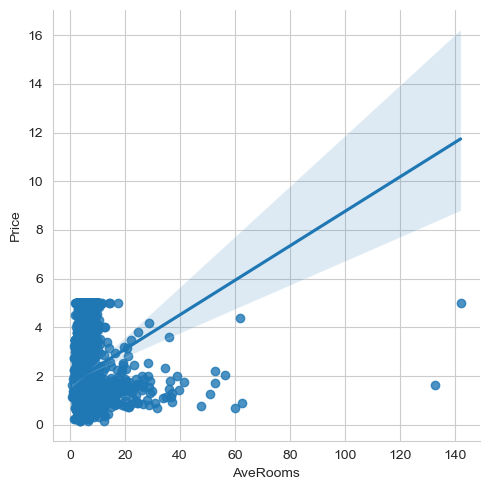

In [21]:
# Plotting a linear fit via seaborn
sns.lmplot(data = df_housing, x = 'AveRooms', y = 'Price')

NOTE - It is good to note that this seaborm method is not suitable for larger, more complicated, regression models. For those more complicated models we will be focusing on the scitkit learn library.

### Step 3: The mathematics behind the Least Squares Method.

This particular project will use the least squares method as the way to estimate the coefficients. Below, for reference, is a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

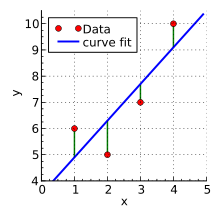

In [2]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations  to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here. If you want further informatino on the mathematics of the above formulas, check out this video [video](https://www.youtube.com/watch?v=Qa2APhWjQPc).

For now, we'll use numpy to do a simple single variable linear regression. Afterwards we'll look at the power of scikit learn to do a full multivariate linear regression.

### Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [33]:
# Set up the X as Average Rooms
X = df_housing.AveRooms

# Use vstack to make X a two-dimensional array
X = np.vstack((df_housing.AveRooms, np.ones(len(X)))).T

# Set up Y as the target price of the houses.
Y = df_housing.Price

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation:
$$y=mx+b$$
which we can rewrite using matrices:
$$y=Ap$$
where:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$
and
$$p= \begin{bmatrix}m \\b\end{bmatrix}$$

This is the same as the first equation if you carry out the linear algebra. 
So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [23]:
'''
Need to figure out why the below method of list comprehension is not working
'''

# Create the X array in the form [X 1]
#X = np.array([[value,1] for value in X])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (20640, 2) + inhomogeneous part.

In [35]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

C:\Users\ggebu\AppData\Local\Temp\ipykernel_12188\1866499646.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, b = np.linalg.lstsq(X, Y)[0]


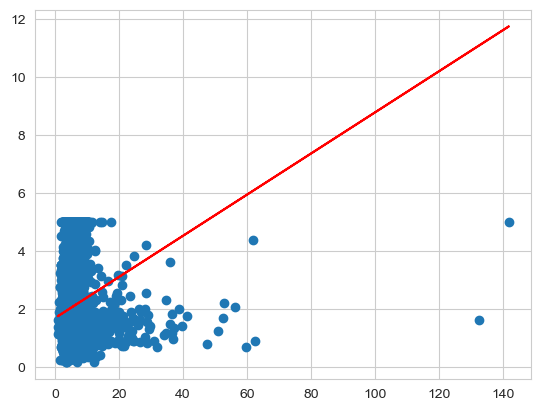

In [36]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(df_housing.AveRooms,df_housing.Price,'o')

# Next the best fit line
x= df_housing.AveRooms
plt.plot(x, m*x + b,'r',label='Best Fit Line')

### Step 5: Getting the error

As done above, we've just completed a single variable regression using the least squares method with Python. Let's see if we can find the error in our fitted line. Checking out the documentation [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier. 

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [38]:
# Get the resulting array
result = np.linalg.lstsq(X,Y, rcond = 1)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 1.14 


C:\Users\ggebu\AppData\Local\Temp\ipykernel_12188\1341421443.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The root mean squared error was %.2f " %rmse)


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Thus we can reasonably expect a house price to be within $228,000 of our line fit.

Put more simply, RMSE is ~ the Standard Deviation. Therefore, SD is ~ 1.14. Which, suggests, based on the 68-95-99.7 rule, 2x the SD will happen 95%. Therefore, 95% the housing price will be 2.28 of the fit line.

Good reference for explaination on RMSE
[here](https://medium.com/@mygreatlearning/rmse-what-does-it-mean-2d446c0b1d0e)

### Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [39]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

Next, we create a LinearRegression object, afterwards, type lm. then press tab to see the list of methods availble on this object.

In [40]:
# Create a LinearRegression Object
lreg = LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](http://en.wikipedia.org/wiki/Coefficient_of_determination)

We'll start the multi variable regression analysis by seperating our califorina dataframe into the data columns and the target columns:

In [42]:
# Data Columns
X_multi = df_housing.drop('Price', axis = 1)

# Targets
Y_target = df_housing.Price

Finally, we're ready to pass the X and Y using the linear regression object.

In [43]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)


LinearRegression()

Let's go ahead check the intercept and number of coefficients.

In [44]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is -36.94 


In [45]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 8 


Great! So we have basically made an equation for a line, but instead of just oneo coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the [documentation](http://scikit-learn.org/stable/modules/linear_model.html) for this equation:
$$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept 

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

In [46]:
# Set a DataFrame from the Features
df_coeff = DataFrame(df_housing.columns)
df_coeff.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
df_coeff["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
df_coeff

,Features,Coefficient Estimate
0,MedInc,0.436693
1,HouseAge,0.009436
2,AveRooms,-0.107322
3,AveBedrms,0.645066
4,Population,-0.000004
5,AveOccup,-0.003787
6,Latitude,-0.421314
7,Longitude,-0.434514
8,Price,NaN


The highest correlation is between AveBedrms and Price

### Step 7: Using Training and Validation 

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is *randomly*.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [48]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,df_housing.Price)

In [49]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(15480, 2) (5160, 2) (15480,) (5160,)


### Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [50]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

Now run a prediction on both the X training set and the testing set.

In [51]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Now we will get the mean square error

In [52]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1.31
Fit a model X_train, and calculate MSE with X_test and Y_test: 1.27


It looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this?

### Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$

You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

Text(0.5, 1.0, 'Residual Plots')

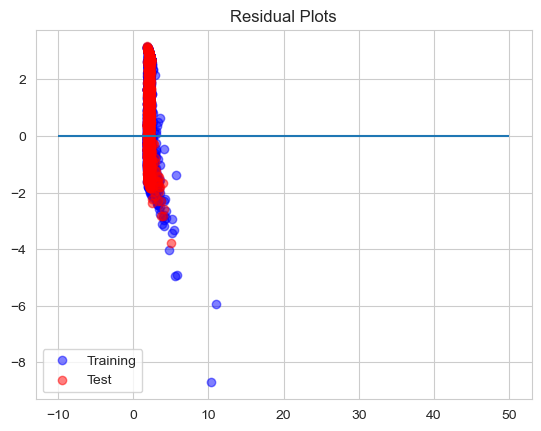

In [53]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

There seems to be a major pattern, therefore, we should be concerned that a linear regression is not a suitable method of prediciton. Which I believe to be expected because of the block nature of the dataset.

We can also make the same residual plot with seaborn

<Axes: xlabel='AveRooms', ylabel='Price'>

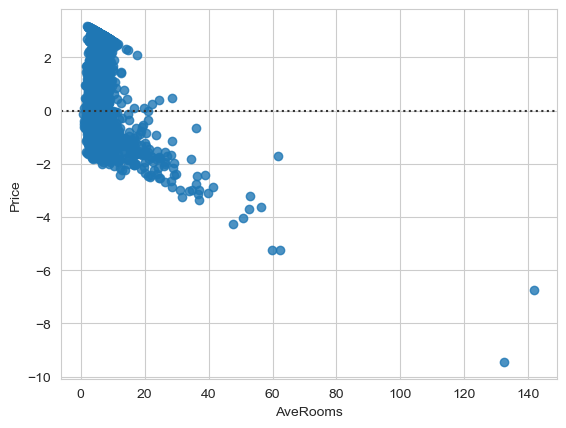

In [55]:
# Residual plot of all the dataset using seaborn
sns.residplot(data = df_housing, x = 'AveRooms', y = 'Price')

Look [here](http://scikit-learn.org/stable/modules/linear_model.html#linear-model) for more Linear Regression Documentation

### Linear Regression - ML Project - Completed